# scatterplots
with Formula 1 data from https://ergast.com/mrd/db

In [1]:
%autosave 0

from tools import *

f1 = ErgastZIP(ERGAST_ZIP)
plot = Plot()

Autosave disabled


In [2]:
fastlaps = (
    f1.results.dropna(subset=['fastlap_kph'])
    .rename(columns={'fastlap_kph': 'kph'})
    .join(f1.races['season id_circuit'.split()], on='id_race')
    .join(f1.circuits['circuit'], on='id_circuit')
    .join(f1.teams['team'], on='id_team')
    ['season circuit team fastlap kph'.split()]
    .sort_values('season circuit kph'.split())
    .reset_index(drop=True)
)
fastlaps

,season,circuit,team,fastlap,kph
0,2004,Albert Park Grand Prix Circuit,Minardi,8,210.666
1,2004,Albert Park Grand Prix Circuit,Minardi,10,211.741
2,2004,Albert Park Grand Prix Circuit,Jordan,15,215.659
3,2004,Albert Park Grand Prix Circuit,McLaren,7,217.098
4,2004,Albert Park Grand Prix Circuit,Jaguar,6,217.336
...,...,...,...,...,...
6217,2019,Yas Marina Circuit,Red Bull,55,197.731
6218,2019,Yas Marina Circuit,Ferrari,44,199.064
6219,2019,Yas Marina Circuit,Ferrari,55,199.688
6220,2019,Yas Marina Circuit,Mercedes,31,200.515


## geschwindigkeitheim

Save /context/data/plots/geschwindigkeitheim.png


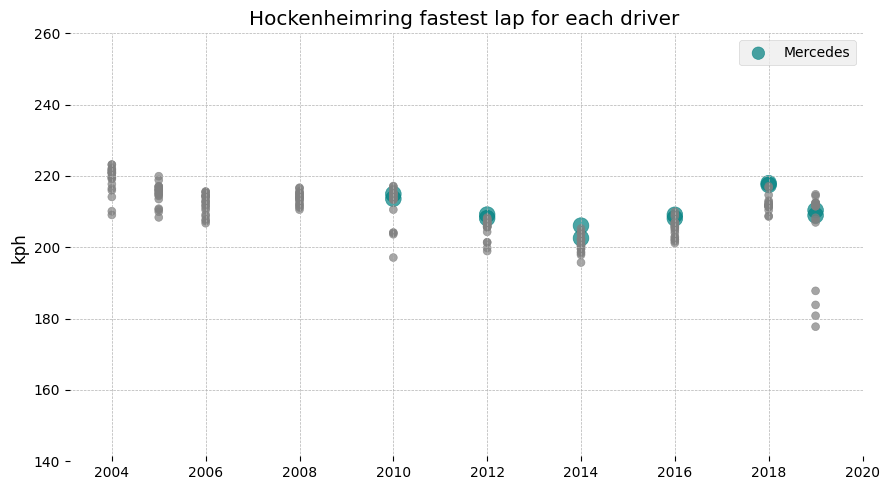

In [3]:
def teamdots(circuit, color, *teams, **kwargs):
    kwset = kwargs.setdefault
    kwset('colorbar', False)
    kwset('title', f"{circuit} fastest lap for each driver") 
    kwset('ylabel', 'kph')
    kwset('xlim', (2003, 2020))
    kwset('ylim', (140, 260))
    
    data = fastlaps.loc[lambda df: df['circuit'].eq(circuit)]
    data = data['season kph team'.split()]
    data['color'] = 'grey'
    data['size'] = 32
    is_team = data['team'].isin(teams)
    data.loc[is_team, 'color'] = color
    data.loc[is_team, 'size'] += 96
    data = data.sort_values('size', ascending=False)
    data.pop('team')
    
    axes = plot.scatter(data, **kwargs)
    axes.legend([' | '.join(teams)])
    
    return axes
    
axes = teamdots('Hockenheimring', 'teal', 'Mercedes')
savepng(axes, 'geschwindigkeitheim')

Save /context/data/plots/velocita_ditalia.png


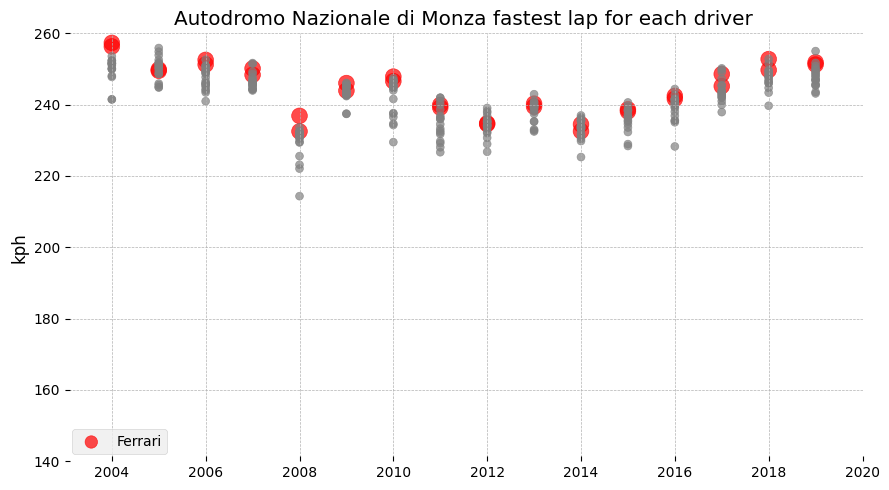

In [4]:
axes = teamdots('Autodromo Nazionale di Monza', 'red', 'Ferrari')
savepng(axes, 'velocita_ditalia')

Save /context/data/plots/lauf_der_stiere.png


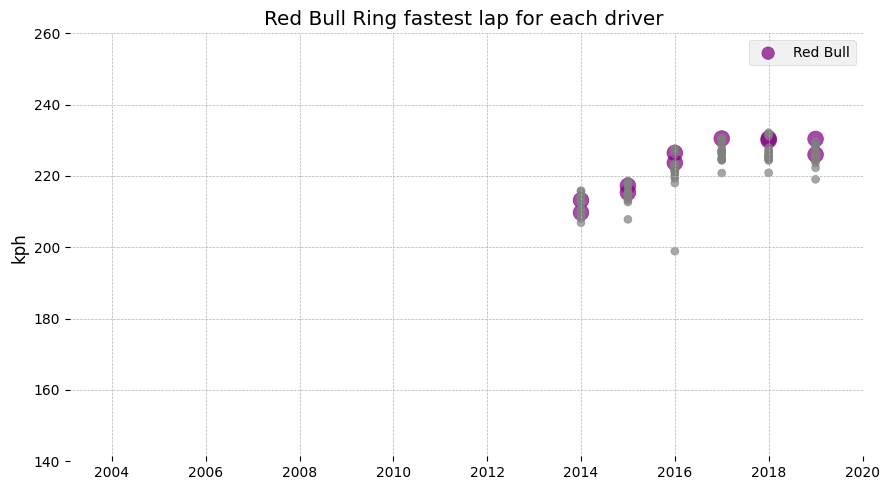

In [5]:
axes = teamdots('Red Bull Ring', 'purple', 'Red Bull')
savepng(axes, 'lauf_der_stiere')

Save /context/data/plots/force_canada.png


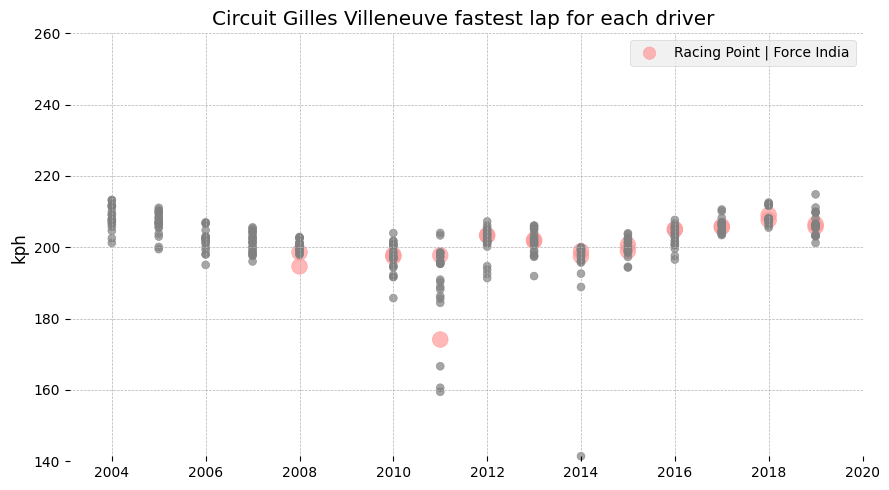

In [6]:
teams = ['Racing Point', 'Force India']
axes = teamdots('Circuit Gilles Villeneuve', '#ff9999', *teams)
savepng(axes, 'force_canada')

## open catalan

Save /context/data/plots/open_catalan.png


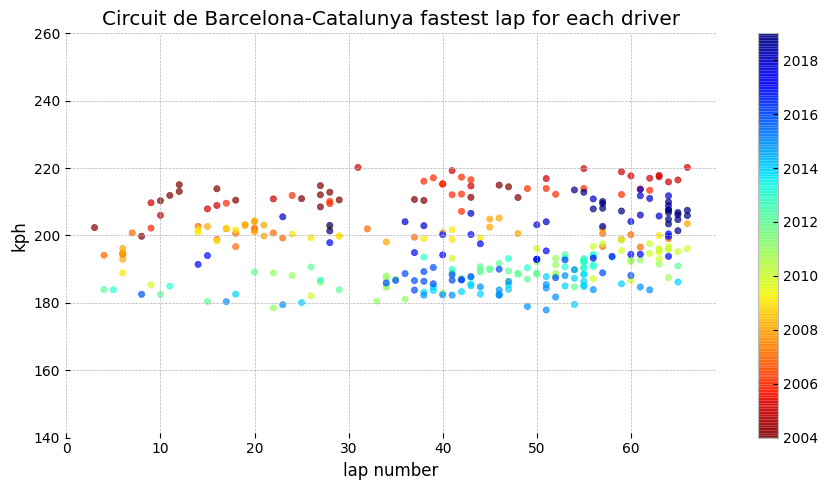

In [7]:
def lapdots(circuit, **kwargs):
    kwset = kwargs.setdefault
    kwset('colorbar', True)
    kwset('cmap', 'jet_r')
    kwset('title', f"{circuit} fastest lap for each driver")
    kwset('xlabel', 'lap number')
    kwset('ylabel', 'kph')
    kwset('ylim', (140, 260))

    data = fastlaps.loc[lambda df: df['circuit'].eq(circuit)]
    data = data['fastlap kph season'.split()]
    
    return plot.scatter(data, **kwargs)

axes = lapdots('Circuit de Barcelona-Catalunya')
savepng(axes, 'open_catalan')

Save /context/data/plots/spoon_benders.png


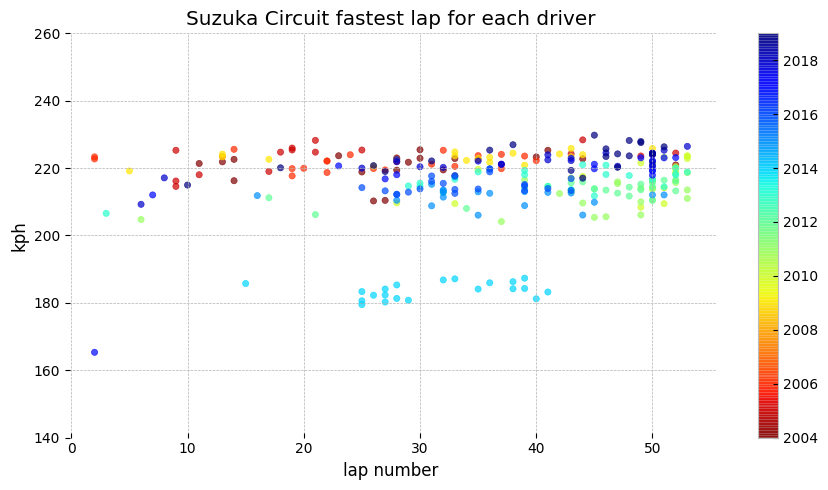

In [8]:
savepng(lapdots('Suzuka Circuit'), 'spoon_benders')

Save /context/data/plots/casino_royale.png


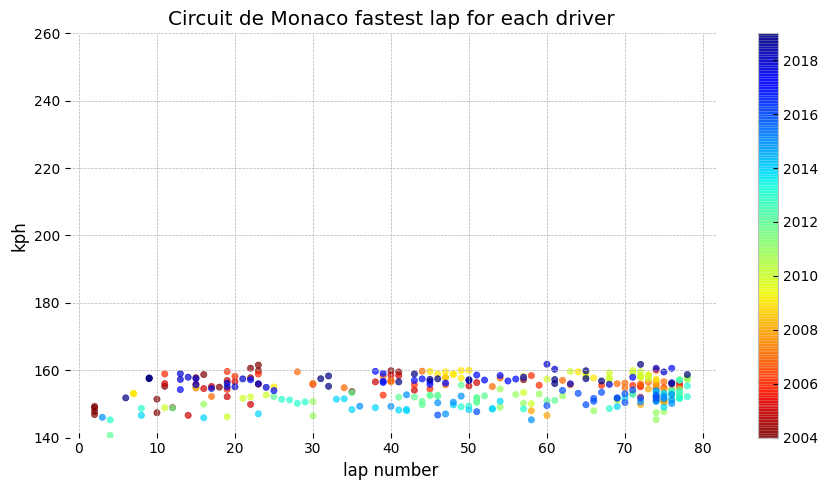

In [9]:
savepng(lapdots('Circuit de Monaco'), 'casino_royale')

Save /context/data/plots/acelerando_do_lago.png


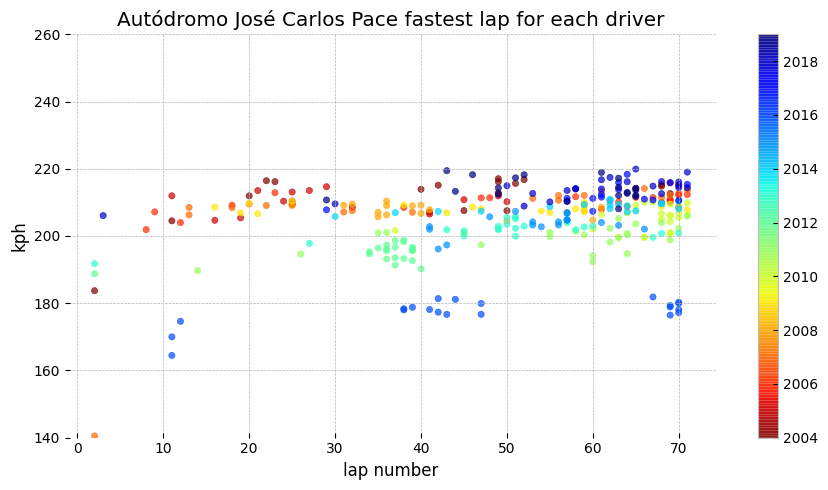

In [10]:
savepng(lapdots('Autódromo José Carlos Pace'), 'acelerando_do_lago')

Save /context/data/plots/rapidite_de_leu_rouge.png


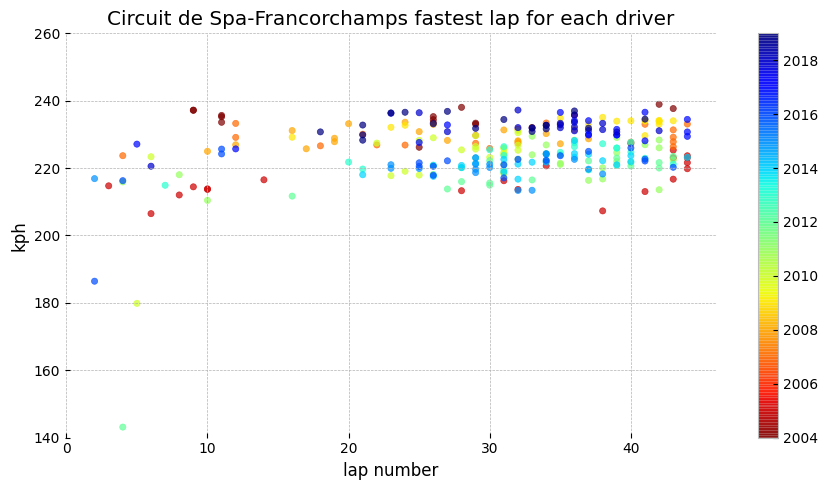

In [11]:
savepng(lapdots('Circuit de Spa-Francorchamps'), 'rapidite_de_leu_rouge')